# Microsoft : Classifying Cybersecurity Incidents with Machine Learning

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read CSV file

data = pd.read_csv(r'C:\Users\Dell\Desktop\VS code\Cybersecurity\GUIDE_Train.csv.zip')


In [3]:
data

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,2024-06-08T15:26:08.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516833,1228360650033,59,196410,748366,2024-06-06T09:40:08.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
9516834,867583395122,44,14117,7425,2024-06-11T22:51:03.000Z,78,57,Exfiltration,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516835,395136991850,43,644,8973,2024-05-20T23:01:01.000Z,52,10,Impact,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [4]:
#get sampling data based on category
df = data.groupby('IncidentGrade').sample(n=600000)

In [5]:
df

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
191713,68719479242,686,123538,1557602,2024-06-07T11:21:26.000Z,5,508,SuspiciousActivity,NaN,BenignPositive,...,NaN,Contextual,5,66,NaN,NaN,NaN,242,1445,10630
2418988,1254130451971,32,13643,15672,2024-06-08T06:00:29.000Z,321,321,Discovery,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
5500096,1142461300738,25,106,49507,2024-06-11T23:13:39.000Z,30,18365,Exfiltration,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
3029363,1666447314510,3,37997,281480,2024-06-10T05:37:08.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
6834055,1211180778537,125,21713,4978,2024-06-12T09:33:43.000Z,257,3137,Exfiltration,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6598446,77309412976,1,1643,529178,2024-06-06T10:21:24.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
4462604,171798692463,93,46996,23013,2024-06-10T12:07:39.000Z,133,2032,Malware,NaN,TruePositive,...,NaN,NaN,5,66,NaN,Suspicious,Malicious,242,1445,10630
4484680,773094114970,1,432,104489,2024-06-11T13:06:15.000Z,0,0,InitialAccess,T1078;T1078.004,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
3638077,1219770712638,558,237333,1499310,2024-06-13T15:57:51.000Z,6,5,InitialAccess,T1566,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [6]:
df.shape

(1800000, 45)

In [7]:
df.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1800000 entries, 191713 to 8838247
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [10]:
df.describe()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
count,1.800000e+06,1.800000e+06,1.800000e+06,1.800000e+06,1.800000e+06,1.800000e+06,1.800000e+06,1.800000e+06,1.800000e+06,1.800000e+06,...,1.800000e+06,1.800000e+06,1.800000e+06,1.800000e+06,1.800000e+06,1.800000e+06,1.800000e+06,1.800000e+06,1.800000e+06,1.800000e+06
mean,8.409186e+11,1.935311e+02,7.229107e+04,4.083663e+05,1.045703e+02,2.739097e+03,9.584369e+04,1.292751e+05,2.844467e+05,1.510125e+05,...,3.338916e+03,8.807659e+02,2.635391e+05,1.082476e+05,3.583849e+03,4.903274e+00,6.471826e+01,2.228498e+02,1.347290e+03,9.907073e+03
std,4.955841e+11,4.068871e+02,1.230874e+05,4.585624e+05,4.144090e+02,1.082249e+04,1.588160e+04,3.301387e+04,1.416838e+05,3.629246e+04,...,5.225749e+02,1.385896e+01,7.982466e+04,3.130226e+04,8.349782e+01,6.872303e-01,9.099540e+00,6.408596e+01,3.579731e+02,2.653841e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.123169e+11,1.000000e+01,4.920000e+02,2.025000e+04,2.000000e+00,2.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
50%,8.332237e+11,4.700000e+01,9.736000e+03,2.157875e+05,8.000000e+00,1.100000e+01,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
75%,1.271310e+12,1.840000e+02,8.562700e+04,6.996522e+05,4.500000e+01,1.670000e+02,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
max,1.709397e+12,6.144000e+03,5.997060e+05,1.721422e+06,9.521000e+03,1.131710e+05,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04


In [12]:
df.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques             0
IncidentGrade               0
ActionGrouped               0
ActionGranular              0
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        1782189
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily                0
FileName                    0
FolderPath

In [9]:
# Select only numeric columns for statistical analysis
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

In [10]:
# Calculate mean, median, and standard deviation for numeric columns
mean_values = numeric_cols.mean()
median_values = numeric_cols.median()
std_values = numeric_cols.std()

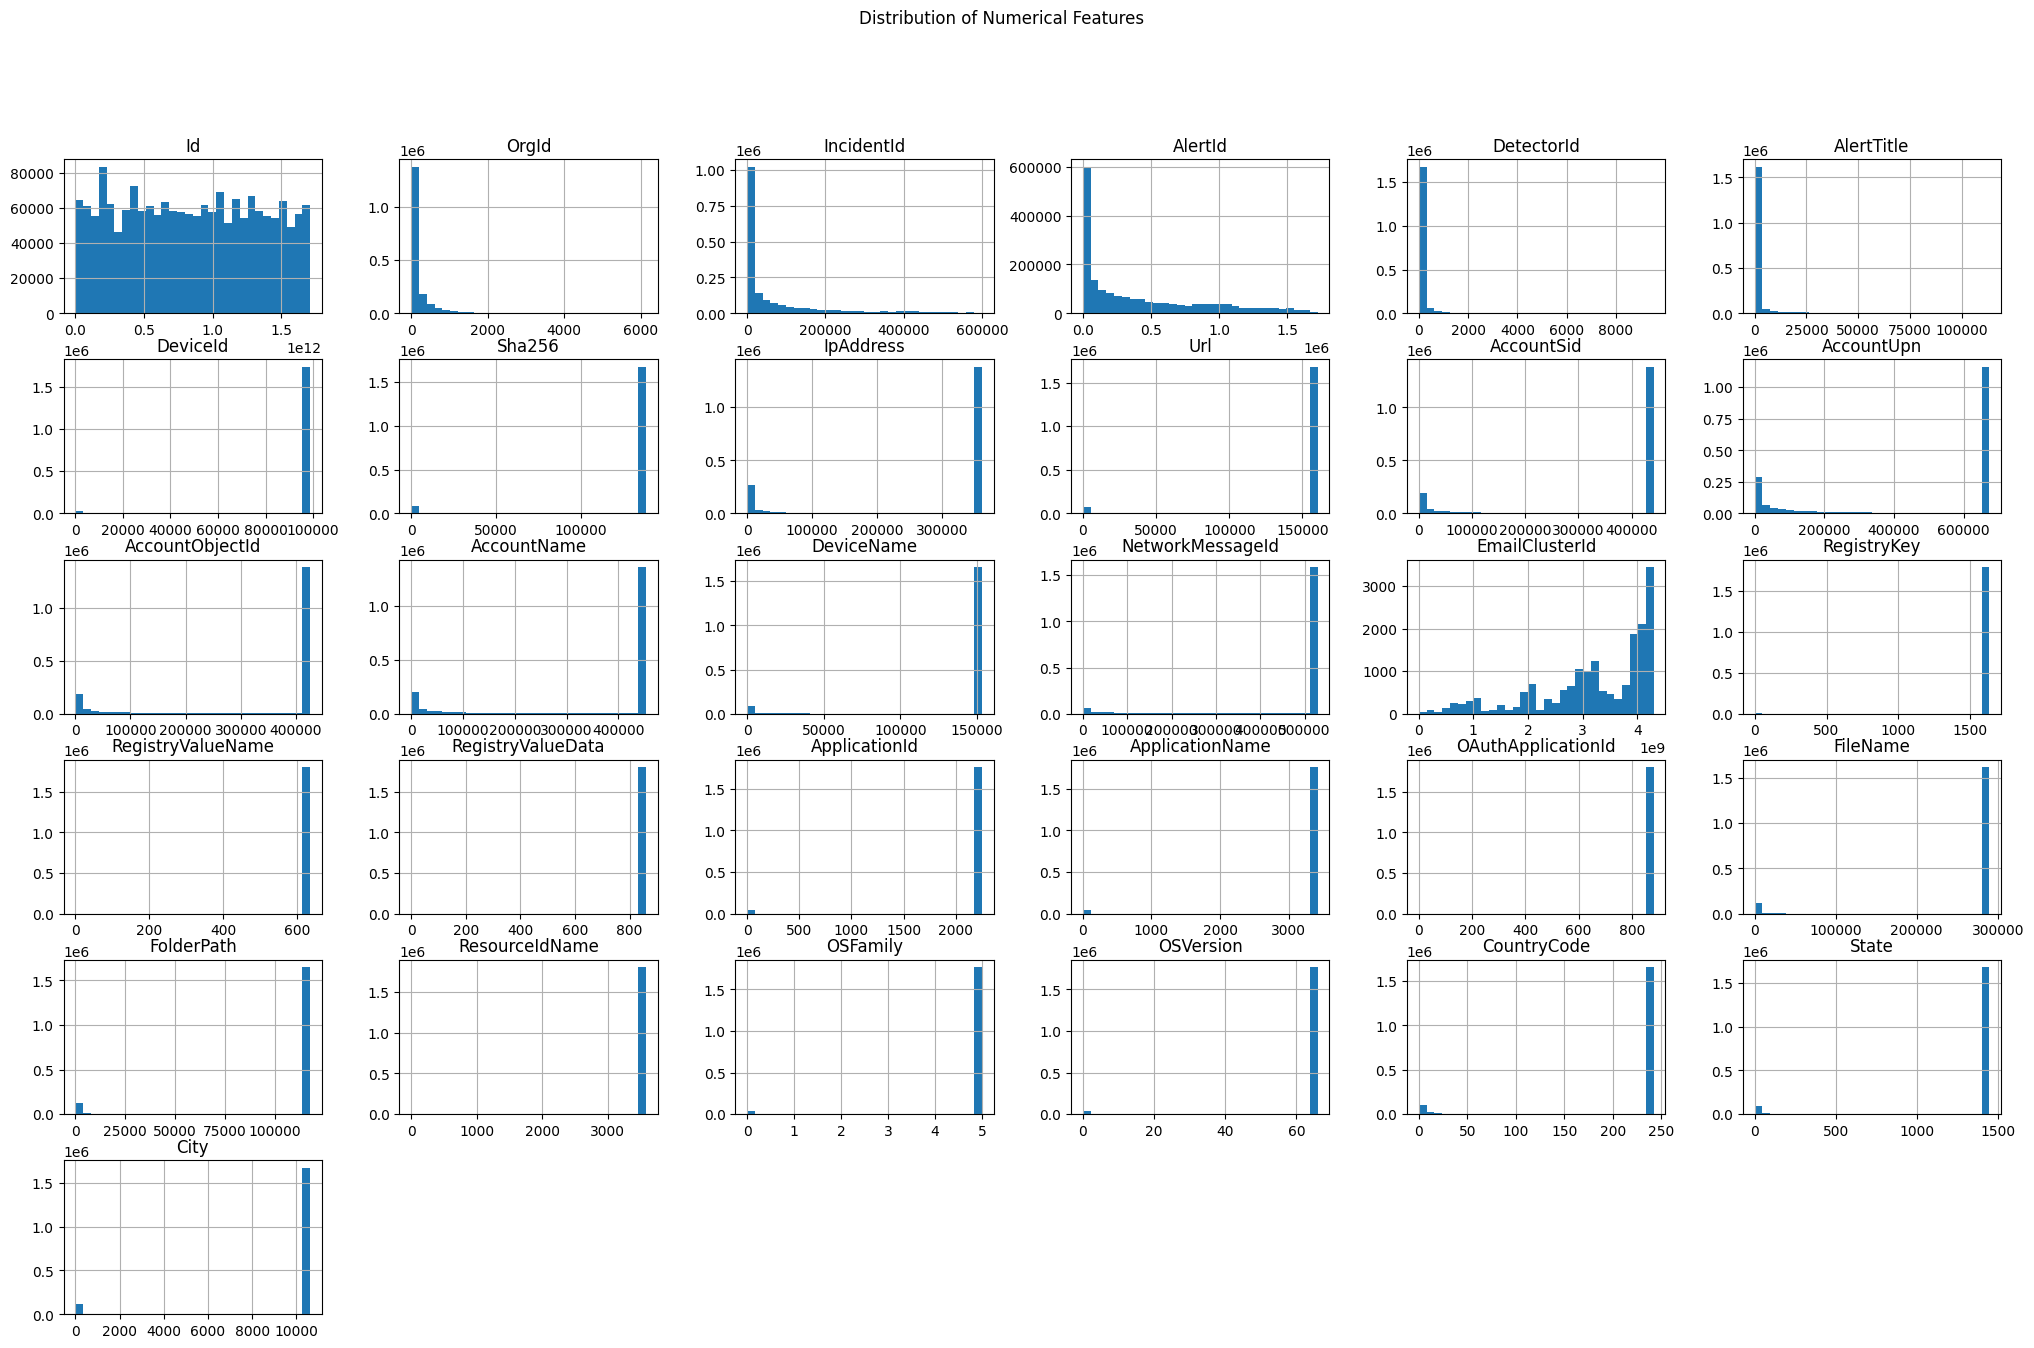

In [14]:
# Histogram for numerical features
numeric_cols.hist(bins=30, figsize=(25, 15))
plt.suptitle('Distribution of Numerical Features')
plt.show()

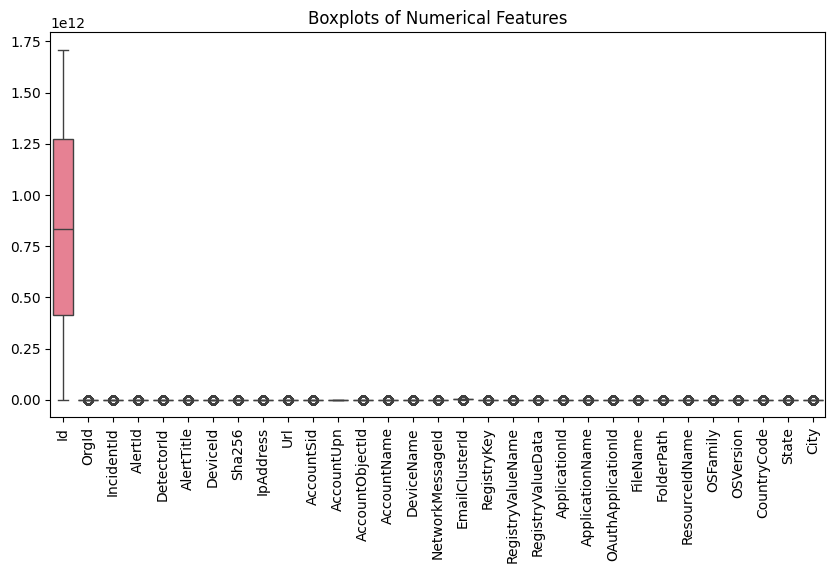

In [15]:
# Boxplot to check for outliers in numerical features
plt.figure(figsize=(10,5))
sns.boxplot(data=numeric_cols)
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=90)
plt.show()

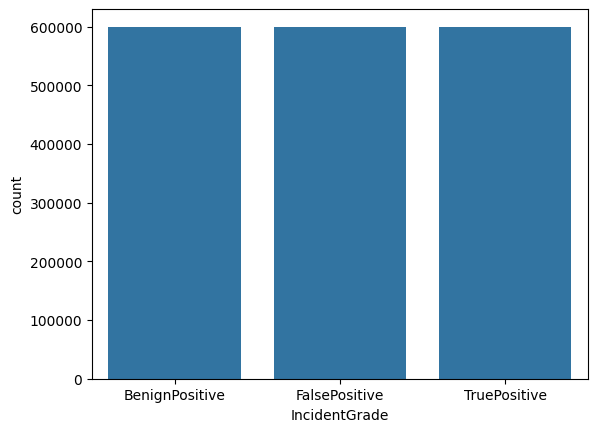

In [16]:
#Distribution of the target variable
sns.countplot(x='IncidentGrade', data=df)
plt.show()

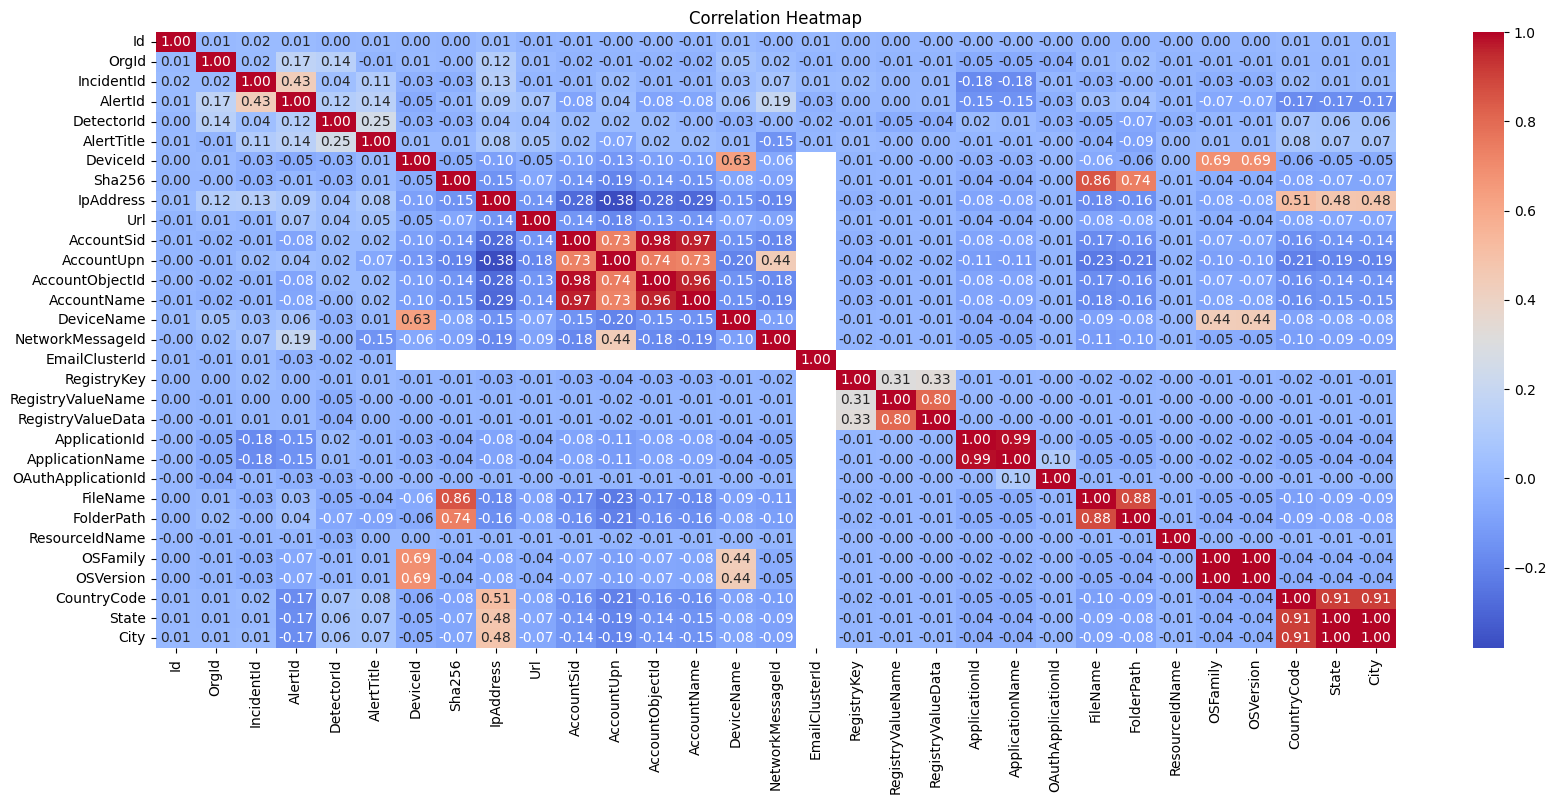

In [17]:
# Correlation heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [11]:

# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns


# Impute missing values for string columns with 'Unknown'
string_columns = ['LastVerdict','SuspicionLevel','AntispamDirection','Roles','ResourceType','ThreatFamily','ActionGranular','ActionGrouped','MitreTechniques']
for col in string_columns:
    df[col].fillna('Unknown', inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12716\2245337053.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


In [13]:
df['EmailClusterId'] = df['EmailClusterId'].fillna(df['EmailClusterId'].mean()) # Fills with the mean of column 'EmailClusterId'

In [14]:
# Example: Extract hour of the day and day of the week from a timestamp feature
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['hour'] = df['Timestamp'].dt.hour
df['day_of_week'] = df['Timestamp'].dt.dayofweek
df.drop(columns=['Timestamp'], inplace=True)


#LabelEncoder

In [15]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

# Add encoded target variable
df['IncidentGrade_encode'] = label_encoder.fit_transform(df['IncidentGrade'])


#Data Splitting

In [91]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['IncidentGrade','IncidentGrade_encode'])  # Features
y = df['IncidentGrade']  # Target

# Stratified Train-Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [39]:
X_val

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,MitreTechniques,ActionGrouped,ActionGranular,...,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,hour,day_of_week
1132517,412316861474,47,10731,5772,57,29,1,426,2,0,...,5,66,4,2,5,242,1445,10630,0,6
9443744,833223657085,145,95649,15900,1,1,10,958,2,0,...,5,66,4,2,5,242,1445,10630,7,5
4027209,644245096174,0,81,388256,0,0,10,610,2,0,...,5,66,4,2,5,242,1445,10630,12,2
9364115,1262720385359,11,435872,958410,0,0,10,610,2,0,...,5,66,4,2,5,242,1445,10630,15,6
7152594,111669151042,44,10596,6614,50,36,7,1025,2,0,...,5,66,4,2,5,242,1445,10630,19,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7649360,858993461891,424,2288,1575007,233,80463,17,1025,2,0,...,5,66,4,1,4,242,1445,10630,15,4
6285541,1245540516043,11,409737,909338,0,0,10,610,2,0,...,5,66,4,2,5,242,1445,10630,7,3
8982298,1357209666879,159,156071,279246,2,2,1,1025,2,0,...,5,66,4,1,4,242,1445,10630,6,2
8594670,798863922210,126,189517,953506,0,0,10,610,2,0,...,5,66,4,2,5,242,1445,10630,21,2


In [22]:
X_train

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,MitreTechniques,ActionGrouped,ActionGranular,...,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,hour,day_of_week
3566312,601295424214,8,9376,264801,3,4,16,1018,2,0,...,5,66,4,1,4,242,1445,10630,2,1
7634565,498216210210,3,40271,202546,3,142,16,1018,2,0,...,5,66,4,1,4,242,1445,10630,19,2
3519634,807453853775,150,37327,631510,2,2,1,1018,2,0,...,5,66,4,1,4,242,1445,10630,14,3
1441596,257698039604,0,129,334470,0,0,10,600,2,0,...,5,66,4,2,5,41,61,72,12,5
3215842,1030792152892,0,294,402097,0,0,10,600,2,0,...,5,66,4,2,5,242,1445,10630,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244936,1546188231023,573,33966,949004,0,0,10,600,2,0,...,5,66,4,2,5,242,1445,10630,10,3
8865744,1202590845939,449,88671,1559522,5,7607,16,1018,2,0,...,5,66,4,2,5,242,1445,10630,2,6
8540795,858993462990,12,119618,151724,74,55,1,576,2,0,...,5,66,4,2,5,242,1445,10630,12,0
6182377,1202590847676,81,190577,289487,65,41648,7,1018,2,0,...,5,66,4,2,5,242,1445,10630,0,4


In [23]:
y_train

3566312    2
7634565    0
3519634    1
1441596    2
3215842    2
          ..
2244936    1
8865744    1
8540795    0
6182377    0
7236070    2
Name: IncidentGrade, Length: 1440000, dtype: int64

#LogisticRegression

In [17]:
from sklearn.linear_model import LogisticRegression

le = LogisticRegression()

le.fit(X_train, y_train)

LogisticRegression()

In [18]:
#Cross Validation
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Define k-fold cross-validation with stratified sampling
k = 5 
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Define the scoring metric (F1 score with macro average)
scoring = make_scorer(f1_score, average='macro')

# Perform k-fold cross-validation using the correct scoring parameter
cv_scores = cross_val_score(le, X_train, y_train, cv=kf, scoring=scoring, n_jobs=-1)

In [19]:
cv_scores

array([0.34716683, 0.27235623, 0.360068  , 0.34814264, 0.27243751])

In [20]:
cv_scores.mean()

np.float64(0.32003424225628196)

In [33]:
#Performance Metrics
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score,accuracy_score

# Predict on the validation set
y_pred_val = le.predict(X_val)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_val,y_pred_val)
f1 = f1_score(y_val, y_pred_val, average='macro')
precision = precision_score(y_val, y_pred_val, average='macro')
recall = recall_score(y_val, y_pred_val, average='macro')

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
print(f"Macro accuracy Score: {accuracy:.4f}")
print(f"Macro F1 Score: {f1:.4f}")
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")

Macro accuracy Score: 0.3397
Macro F1 Score: 0.2717
Macro Precision: 0.2265
Macro Recall: 0.3397


In [35]:
# Detailed classification report
print(classification_report(y_val, y_pred_val, target_names=['TP', 'BP', 'FP']))

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

          TP       0.34      0.51      0.41    120000
          BP       0.00      0.00      0.00    120000
          FP       0.34      0.51      0.41    120000

    accuracy                           0.34    360000
   macro avg       0.23      0.34      0.27    360000
weighted avg       0.23      0.34      0.27    360000



c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
#Hyperparameter Tunning
from sklearn.model_selection import RandomizedSearchCV


# Define a more focused parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1.0, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200],
}

random_search = RandomizedSearchCV(le,param_distributions=param_grid,n_iter=10,cv=3,n_jobs=-1)


# Fit RandomizedSearchCV on the sampled training data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

In [52]:
print("Best Parameters:", best_params)
print("Best F1 Macro Score:", best_score)

Best Parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 200, 'C': 0.1}
Best F1 Macro Score: 0.44295625


In [53]:
#Handling Class Imbalance
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

# Train the XGBoost model on the resampled data
le.fit(X_train_res, y_train_res)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12716\1419014526.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

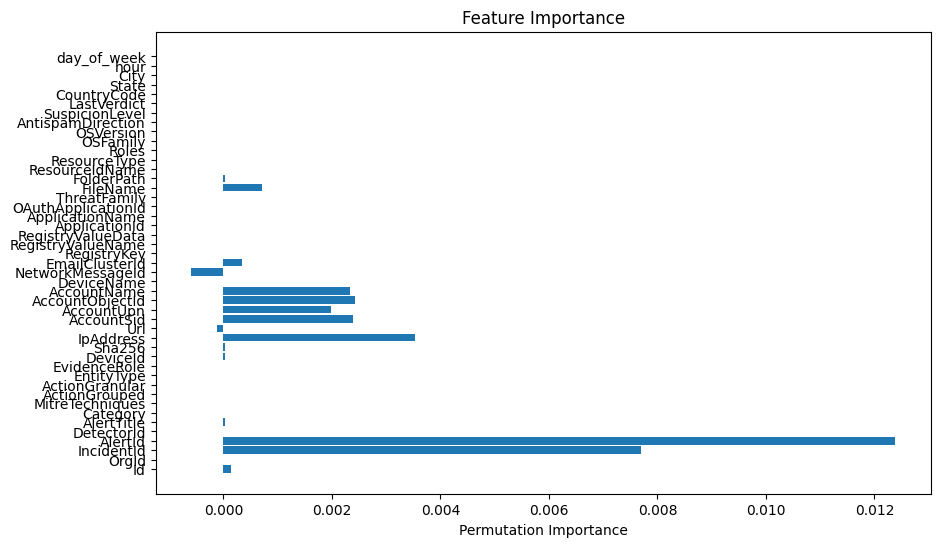

In [54]:
#Feature Importance
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Assuming X_train_sample and y_train_sample are defined as subsets of your data
X_train_sample = X_train.sample(frac=0.1, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Feature names from the sampled training set
feature_names = X_train_sample.columns

# Compute permutation importance
results = permutation_importance(le, X_train_sample, y_train_sample, scoring='f1_macro', n_jobs=-1)

# Get the mean importance values
importance = results.importances_mean

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance)
plt.xlabel('Permutation Importance')
plt.title('Feature Importance')
plt.show()



In [55]:
importance

array([ 1.40553244e-04,  0.00000000e+00,  7.69918758e-03,  1.23879037e-02,
        0.00000000e+00,  1.96233397e-05,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.06349926e-05,  2.94603871e-05,  3.53724840e-03, -1.10729608e-04,
        2.38696810e-03,  1.98393476e-03,  2.41583429e-03,  2.32623560e-03,
       -1.27210693e-06, -5.99240725e-04,  3.41881271e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  7.18541025e-04,  3.51391112e-05,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.35673705e-06, -1.00696182e-05,  0.00000000e+00,
        0.00000000e+00])

In [56]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Generate predictions
y_pred = le.predict(X_val)


In [57]:
# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred, labels=le.classes_)

# Display confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[75643 16675 27682]
 [67280 11524 41196]
 [48130 21027 50843]]


In [58]:
# Generate a classification report for precision, recall, and F1-score
report = classification_report(y_val, y_pred, target_names=le.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.395927,0.630358,0.486367,120000.000000
1,0.234104,0.096033,0.136197,120000.000000
2,0.424679,0.423692,0.424185,120000.000000
accuracy,0.383361,0.383361,0.383361,0.383361
macro avg,0.351570,0.383361,0.348916,360000.000000
weighted avg,0.351570,0.383361,0.348916,360000.000000


In [59]:
# Create a DataFrame of actual vs predicted values
misclassified = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred, 'Index': X_val.index})

# Filter out the correct predictions
misclassified = misclassified[misclassified['Actual'] != misclassified['Predicted']]

# Show misclassified instances
misclassified.head()

,Actual,Predicted,Index
6715122,1,0,6715122
8781228,2,0,8781228
2608998,2,0,2608998
937637,1,0,937637
8071942,1,0,8071942


#RandomForestClassifier

In [89]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42)

In [92]:
#Performance Metrics
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score,accuracy_score

# Predict on the validation set
y_pred_val = rf.predict(X_val)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_val,y_pred_val)
f1 = f1_score(y_val, y_pred_val, average='macro')
precision = precision_score(y_val, y_pred_val, average='macro')
recall = recall_score(y_val, y_pred_val, average='macro')

In [31]:
print(f"Macro accurancy Score: {accuracy:.4f}")
print(f"Macro F1 Score: {f1:.4f}")
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")

Macro accurancy Score: 0.9560
Macro F1 Score: 0.9560
Macro Precision: 0.9562
Macro Recall: 0.9560


In [32]:
# Detailed classification report
print(classification_report(y_val, y_pred_val, target_names=['TP', 'BP', 'FP']))

              precision    recall  f1-score   support

          TP       0.94      0.96      0.95    120000
          BP       0.95      0.96      0.96    120000
          FP       0.97      0.95      0.96    120000

    accuracy                           0.96    360000
   macro avg       0.96      0.96      0.96    360000
weighted avg       0.96      0.96      0.96    360000



In [79]:
#Hyperparameter Tunning
from sklearn.model_selection import RandomizedSearchCV


# Define a parameter grid specific to RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100],  # Fewer trees to start with
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}


random_search = RandomizedSearchCV(rf,param_distributions=param_grid,n_iter=5,cv=3,n_jobs=-1)


# Fit RandomizedSearchCV on the sampled training data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.7min


In [80]:
print("Best Parameters:", best_params)
print("Best F1 Macro Score:", best_score)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}
Best F1 Macro Score: 0.7765944444444445


In [81]:
#Handling Class Imbalance
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

# Train the XGBoost model on the resampled data
rf.set_params(verbose=1)
rf.fit(X_train_res, y_train_res)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12716\2977527880.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  6.4min


RandomForestClassifier(verbose=1)

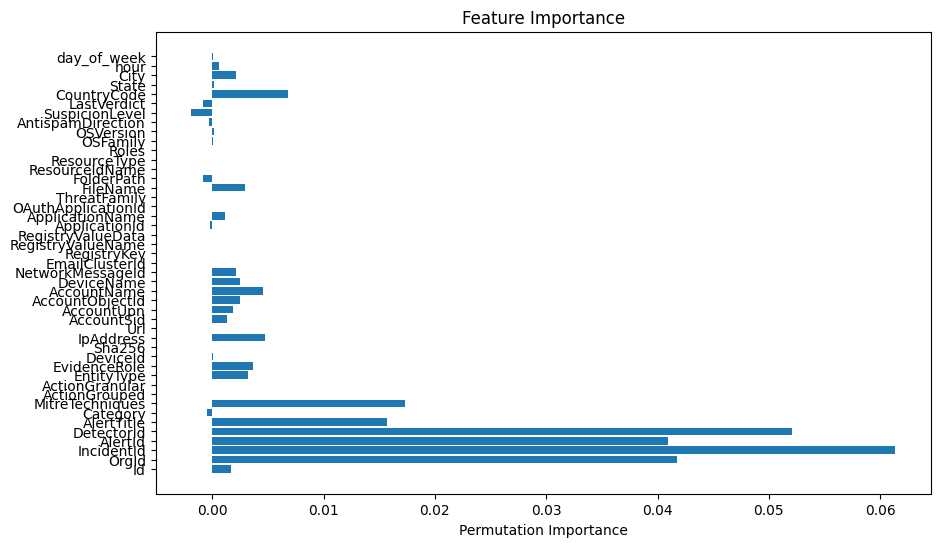

In [84]:
#Feature Importance
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Further reduce the sample size for quicker testing
X_train_sample = X_train.sample(n=100000, random_state=42)  # Limit to 1000 samples
y_train_sample = y_train.loc[X_train_sample.index]

# Feature names from the sampled training set
feature_names = X_train_sample.columns

# Compute permutation importance with a simplified model (smaller n_estimators)
simplified_rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
simplified_rf.fit(X_train_sample, y_train_sample)

# Compute permutation importance
results = permutation_importance(simplified_rf, X_train_sample, y_train_sample, scoring='f1_macro', n_jobs=2)  # Limit parallel jobs

# Get the mean importance values
importance = results.importances_mean

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance)
plt.xlabel('Permutation Importance')
plt.title('Feature Importance')
plt.show()


In [85]:
importance

array([ 1.69184832e-03,  4.17404723e-02,  6.13749020e-02,  4.09361657e-02,
        5.21038110e-02,  1.57344396e-02, -4.23189827e-04,  1.73268194e-02,
        5.00968245e-06,  0.00000000e+00,  3.24535048e-03,  3.69869697e-03,
        7.89127232e-05,  6.90233520e-06,  4.72564110e-03,  0.00000000e+00,
        1.31551268e-03,  1.90825580e-03,  2.51653176e-03,  4.56566421e-03,
        2.50320726e-03,  2.10634462e-03,  2.28131656e-06,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.21685589e-04,  1.17297481e-03,
        0.00000000e+00,  0.00000000e+00,  2.91353397e-03, -8.23285630e-04,
        0.00000000e+00,  0.00000000e+00,  2.18445263e-05,  1.11886386e-04,
        1.83470088e-04, -2.81237341e-04, -1.90631746e-03, -8.54365328e-04,
        6.83174212e-03,  1.74513460e-04,  2.13953798e-03,  5.85007506e-04,
        5.03483591e-05])

In [93]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Generate predictions
y_pred = rf.predict(X_val)

In [94]:
# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred, labels=rf.classes_)

# Display confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[108476   9492   2032]
 [ 55993  61172   2835]
 [ 40226   8276  71498]]


In [95]:
# Generate a classification report for precision, recall, and F1-score
report = classification_report(y_val, y_pred, target_names=rf.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.529940,0.903967,0.668172,120000.00000
1,0.774918,0.509767,0.614979,120000.00000
2,0.936267,0.595817,0.728215,120000.00000
accuracy,0.669850,0.669850,0.669850,0.66985
macro avg,0.747041,0.669850,0.670455,360000.00000
weighted avg,0.747041,0.669850,0.670455,360000.00000


In [96]:
# Create a DataFrame of actual vs predicted values
misclassified = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred, 'Index': X_val.index})

# Filter out the correct predictions
misclassified = misclassified[misclassified['Actual'] != misclassified['Predicted']]

# Show misclassified instances
misclassified.head()


,Actual,Predicted,Index
6715122,1,0,6715122
2608998,2,0,2608998
937637,1,0,937637
4044716,0,1,4044716
8071942,1,0,8071942


#XGBClassifier

In [36]:
from xgboost import XGBClassifier

# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [11]:
#Cross Validation
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Define k-fold cross-validation with stratified sampling
k = 5 
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Define the scoring metric (F1 score with macro average)
scoring = make_scorer(f1_score, average='macro')

# Perform k-fold cross-validation using the correct scoring parameter
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring=scoring, n_jobs=-1)

In [29]:
cv_scores

array([0.9149622 , 0.9145487 , 0.91709311, 0.91382299, 0.91564101])

In [30]:
cv_scores.mean()

np.float64(0.9152136031010272)

In [37]:
#Performance Metrics
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score,accuracy_score

# Predict on the validation set
y_pred_val = xgb_model.predict(X_val)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val, average='macro')
precision = precision_score(y_val, y_pred_val, average='macro')
recall = recall_score(y_val, y_pred_val, average='macro')

In [38]:
print(f"Macro accuracy Score: {accuracy:.4f}")
print(f"Macro F1 Score: {f1:.4f}")
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")

Macro accuracy Score: 0.9136
Macro F1 Score: 0.9137
Macro Precision: 0.9145
Macro Recall: 0.9136


In [39]:
# Detailed classification report
print(classification_report(y_val, y_pred_val, target_names=['TP', 'BP', 'FP']))

              precision    recall  f1-score   support

          TP       0.90      0.91      0.91    120000
          BP       0.90      0.93      0.91    120000
          FP       0.95      0.90      0.92    120000

    accuracy                           0.91    360000
   macro avg       0.91      0.91      0.91    360000
weighted avg       0.91      0.91      0.91    360000



In [43]:
#Hyperparameter Tunning
from sklearn.model_selection import RandomizedSearchCV


# Define a more focused parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01],
    'max_depth': [3],
    'n_estimators': [100],
    'subsample': [0.8]
}

random_search = RandomizedSearchCV(xgb_model,param_distributions=param_grid,n_iter=10,cv=3,n_jobs=-1)


# Fit RandomizedSearchCV on the sampled training data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [44]:
print("Best Parameters:", best_params)
print("Best F1 Macro Score:", best_score)

Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01}
Best F1 Macro Score: 0.6111180555555555


In [45]:
#Handling Class Imbalance
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

# Train the XGBoost model on the resampled data
xgb_model.fit(X_train_res, y_train_res)



C:\Users\Dell\AppData\Local\Temp\ipykernel_12716\3452253177.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

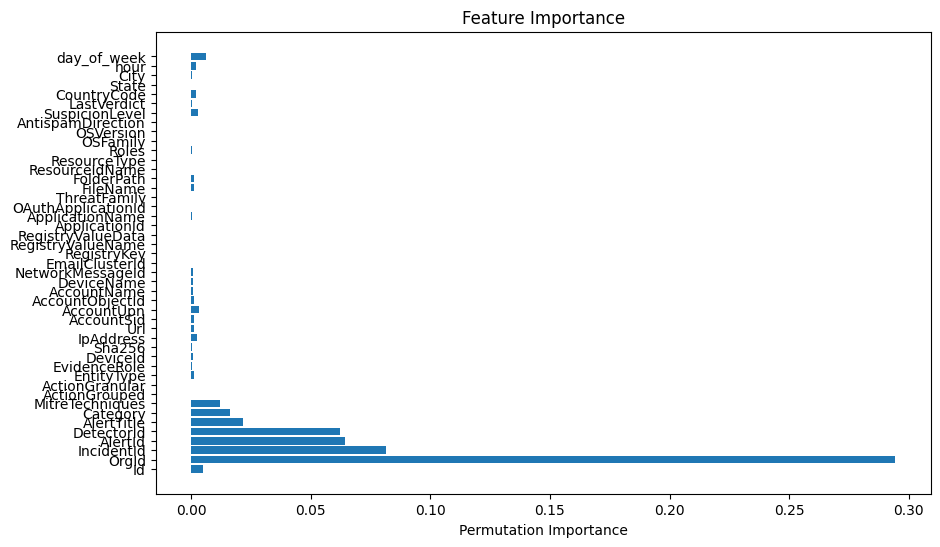

In [48]:
#Feature Importance
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Assuming X_train_sample and y_train_sample are defined as subsets of your data
X_train_sample = X_train.sample(frac=0.1, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Feature names from the sampled training set
feature_names = X_train_sample.columns

# Compute permutation importance
results = permutation_importance(xgb_model, X_train_sample, y_train_sample, scoring='f1_macro', n_jobs=-1)

# Get the mean importance values
importance = results.importances_mean

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance)
plt.xlabel('Permutation Importance')
plt.title('Feature Importance')
plt.show()



In [34]:
importance

array([ 7.74504590e-03,  2.91159722e-01,  8.72367924e-02,  6.89946515e-02,
        7.27548453e-02,  2.82963598e-02,  1.99041985e-02,  1.58828665e-02,
        1.28090234e-06,  7.60727237e-05,  2.38691599e-03,  4.43364400e-04,
        1.06960119e-03,  5.40592939e-04,  2.14892410e-03,  1.13662045e-03,
        2.21489861e-03,  3.15400488e-03,  1.71756812e-03,  1.02428191e-03,
        9.74885234e-04,  9.95144861e-04,  7.76076105e-05,  8.88513281e-05,
        1.72175307e-05,  7.69743784e-06,  1.20355560e-04,  3.55485844e-04,
        0.00000000e+00, -8.23416083e-06,  8.45079510e-04,  9.19930063e-04,
        1.86335919e-05,  4.39238109e-05,  6.19736351e-04,  1.14356040e-04,
        4.51471508e-05,  1.59295183e-04,  1.66088350e-03,  8.48869089e-04,
        2.28911893e-03,  3.85987648e-05,  1.75643377e-04])

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Generate predictions
y_pred = xgb_model.predict(X_val)


In [16]:
# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred, labels=xgb_model.classes_)

# Display confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[109243   7520   3237]
 [  5481 111568   2951]
 [  6116   5827 108057]]


In [17]:
# Generate a classification report for precision, recall, and F1-score
report = classification_report(y_val, y_pred, target_names=xgb_model.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.904030,0.910358,0.907183,120000.000000
1,0.893151,0.929733,0.911075,120000.000000
2,0.945836,0.900475,0.922598,120000.000000
accuracy,0.913522,0.913522,0.913522,0.913522
macro avg,0.914339,0.913522,0.913619,360000.000000
weighted avg,0.914339,0.913522,0.913619,360000.000000


In [18]:
# Create a DataFrame of actual vs predicted values
misclassified = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred, 'Index': X_val.index})

# Filter out the correct predictions
misclassified = misclassified[misclassified['Actual'] != misclassified['Predicted']]

# Show misclassified instances
misclassified.head()


,Actual,Predicted,Index
6199460,0,1,6199460
2367687,2,0,2367687
5731838,2,1,5731838
503382,0,1,503382
5259128,0,1,5259128


#test compare in LogisticRegression

In [65]:
import pandas as pd

# Load the test dataset
test_df = pd.read_csv(r'C:\Users\Dell\Desktop\VS code\Cybersecurity\GUIDE_Test.csv.zip')

C:\Users\Dell\AppData\Local\Temp\ipykernel_12716\907223106.py:4: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv(r'C:\Users\Dell\Desktop\VS code\Cybersecurity\GUIDE_Test.csv.zip')


In [67]:

# Separate numerical and categorical columns
numerical_columns = test_df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = test_df.select_dtypes(include=['object']).columns


# Impute missing values for string columns with 'Unknown'
string_columns = ['LastVerdict','SuspicionLevel','AntispamDirection','Roles','ResourceType','ThreatFamily','ActionGranular','ActionGrouped','MitreTechniques']
for col in string_columns:
    test_df[col].fillna('Unknown', inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12716\565613956.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df[col].fillna('Unknown', inplace=True)


In [68]:
test_df['EmailClusterId'] = test_df['EmailClusterId'].fillna(test_df['EmailClusterId'].mean()) # Fills with the mean of column 'EmailClusterId'

In [69]:
# Example: Extract hour of the day and day of the week from a timestamp feature
test_df['Timestamp'] = pd.to_datetime(test_df['Timestamp'])
test_df['hour'] = test_df['Timestamp'].dt.hour
test_df['day_of_week'] = test_df['Timestamp'].dt.dayofweek
test_df.drop(columns=['Timestamp'], inplace=True)


#Test LabelEncoder

In [70]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
for col in test_df.select_dtypes(include=['object']).columns:
    test_df[col] = label_encoder.fit_transform(test_df[col])

# Add encoded target variable
test_df['IncidentGrade_encode'] = label_encoder.fit_transform(test_df['IncidentGrade'])


#Test Data Splitting

In [71]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = test_df.drop(columns=['IncidentGrade','IncidentGrade_encode'])  # Features
y = test_df['IncidentGrade']  # Target

# Stratified Train-Validation Split
X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


#LogisticRegression

In [72]:
from sklearn.linear_model import LogisticRegression

le = LogisticRegression()

le.fit(X_test, y_test)

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

# Predict on the validation set
y_pred_val = le.predict(X_val)

# Calculate and print evaluation metrics
f1 = f1_score(y_val, y_pred_val, average='macro')
precision = precision_score(y_val, y_pred_val, average='macro')
recall = recall_score(y_val, y_pred_val, average='macro')

In [74]:
print(f"Macro F1 Score: {f1:.4f}")
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")

Macro F1 Score: 0.3395
Macro Precision: 0.3876
Macro Recall: 0.3911


In [75]:
# Detailed classification report
print(classification_report(y_val, y_pred_val, target_names=['TP', 'BP', 'FP']))

              precision    recall  f1-score   support

          TP       0.47      0.77      0.59    350588
          BP       0.23      0.00      0.00    180540
          FP       0.46      0.40      0.43    298471

    accuracy                           0.47    829599
   macro avg       0.39      0.39      0.34    829599
weighted avg       0.42      0.47      0.40    829599



In [77]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

y_pred = le.predict(X_test)

# Compute metrics if lengths are consistent
if len(y_test) == len(y_pred):
    
    # Compute metrics for optimized model
    optimized_macro_f1 = f1_score(y_test, y_pred, average='macro')
    optimized_precision = precision_score(y_test, y_pred, average='macro')
    optimized_recall = recall_score(y_test, y_pred, average='macro')

    print(f"Optimized Macro-F1 Score: {optimized_macro_f1:.4f}")
    print(f"Optimized Precision: {optimized_precision:.4f}")
    print(f"Optimized Recall: {optimized_recall:.4f}")
else:
    print("Mismatch in lengths of y_test and y_pred. Please check data and predictions.")


Optimized Macro-F1 Score: 0.3394
Optimized Precision: 0.3773
Optimized Recall: 0.3911
